# **TUGAS 2 - Topic Modelling**

## **Install Environment**

Berikut Beberapa Environment nya:

*   Beautifulsoup4 adalah paket Python yang digunakan untuk mengekstrak informasi dari halaman web HTML dan XML.
*   Request2 adalah sebuah paket yang digunakan untuk melakukan permintaan HTTP di Python. Ini berguna untuk mengambil data dari situs web atau API.
*   Pandas adalah paket untuk analisis data di Python. Ini menyediakan struktur data tingkat tinggi seperti DataFrame, yang mempermudah mengolah dan menganalisis data tabular.
*   Snscrape adalah alat untuk mengekstrak data dari media sosial.
*   Seaborn adalah paket untuk membuat visualisasi data statistik.
*   Matplotlib adalah paket plotting dasar di Python. Ini digunakan bersama dengan Seaborn dan pandas untuk membuat visualisasi data.

In [ ]:
!pip install beautifulsoup4
!pip install request2
!pip install pandas
!pip install snscrape
!pip install seaborn
!pip install matplotlib

## **Crawling Data PTA Trunojoyo**

Pada Crawling ini diambil data PTA dari PGSD

In [ ]:
data = []
url = 'https://pta.trunojoyo.ac.id/c_search/byprod/18/'
for page in range(1,184):
  req = requests.get(url+str(page))
  soup = BeautifulSoup(req.text, 'html.parser')
  items = soup.findAll('li', {'data-cat' : '#luxury'})
  #lengkap = []
  for it in items:
    isi = it.find('a', 'gray button')['href']
    print(isi)
    #lengkap.append(isi)
    url2 = isi
    req2 = requests.get(url2)
    soup2 = BeautifulSoup(req2.text, 'html.parser')
    items2 = soup2.findAll('li', {'data-cat' : '#luxury'})
    for t in items2:
      nama = t.find('span').text
      print(nama)
      judul = t.find('a', 'title').text
      print(judul)
      #abstrak = it.find('p', {'size', '680x220'})
      #print(abstrak)
      items3 = soup2.findAll('div', {'style' : 'margin: 15px 15px 15px 15px;'})
      for i in items3:
        absk = i.find('p').text
        print(absk)
        data.append([nama, judul, absk])
ptapgsd = pd.DataFrame(data, columns=['penulis','Judul', 'abstrak'])
ptapgsd.to_csv('dataptapgsd.csv', index=False)

## **Preprocessing**

Preprocessing adalah suatu tahap atau serangkaian langkah yang dilakukan pada data sebelum masuk ke dalam proses utama atau analisis lebih lanjut. Tujuan dari preprocessing adalah untuk mempersiapkan data agar lebih sesuai dan efektif untuk diproses oleh algoritma atau model yang akan digunakan. Beberapa tugas umum dalam preprocessing data melibatkan pembersihan data, transformasi data, pengurangan dimensi, dan normalisasi data

In [ ]:
import pandas as pd
import numpy as np
import re

### Menampilkan data

Menampilkan data hasil crawlinng yang sudah disimpan di Github

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Nicolas271101/ppw/main/dataptapgsd.csv")
df

,Judul,penulis,Dosen Pembimbing I,Dosen Pembimbing II,abstrak
0,Pengaruh Penggunaan Media Audio Visual Terhada...,Penulis : Dessy Setyowati,"Drs. Harun Al Rasyid, M.Si","Wanda Ramansyah, S.Pd., M.Pd",Latar belakang penelitian ini adalah penggunaa...
1,Strategi Sekolah dalam Upaya Penguatan Karakte...,Penulis : Holiyah Sari,"Mujtahidin, S.Pd., M.Pd","Moh. Edy Nurtamam, S.Pd., M.Si",Penelitian ini bertujuan untuk mengetahui gamb...
2,Perbandingan Hasil Belajar Cooperative Learnin...,Penulis : Dwi Indah Rahayuingsih,"Eva Ari Wahyuni, S.Pd., M.Si","Muhammad Busyro Karim, S.Ag., M.Si",Penelitian âPerbandingan Hasil Belajar Coope...
3,Kemampuan Berpikir Tingkat Tinggi Siswa Kelas ...,Penulis : Fatimatus Zakiyah,"Priyono Tri Febrianto, S.Sos., M.Si","Wahid Khoirul Ikhwan, M.Pd",Penelitian ini bertujuan untuk mengetahui kema...
4,Hubungan Antara Kemandirian Belajar dengan Has...,Penulis : Diska Febriadi,"Drs. Harun Al Rasyid, M.Si.","Muhammad Busyro Karim, S.Ag., M.Si.",Penelitian ini bertujuan untuk mengetahui hubu...
...,...,...,...,...,...
908,PENGEMBANGAN MAJALAH BERBASIS GAME MOBILE LEGE...,Penulis : ALDY ADITYA FABIAN YAHYA,"Fachrur Rozie, S.Pd.,M.Pd.","Bagus Rahmad Wijaya, S.Pd., M.Pd.",ABSTRAK\nTujuan penelitian pengembangan ini...
909,PENGEMBANGAN PERANGKAT PEMBELAJARAN MODEL\nPRO...,Penulis : Ratih Permatasari,"Rika Wulandari, S.Pd., M.Pd","Conny Dian Sumadi ,S.Pd., M.Pd",ABSTRAK\nPerangkat pembelajaran adalah bentuk ...
910,Problematika Pembelajaran Daring Siswa Kelas R...,Penulis : Zuliya Safutri,"Mahmud, S.IP., M.Si.","Nilamsari Damayanti Fajrin, S.Pd., M.Pd.",Tujuan dalam Penelitian ini adalah mengetahui ...
911,PENDAMPINGAN ORANG TUA DALAM PROSES BELAJAR AN...,Penulis : Lyta Pranawati,"Priyono Tri Febrianto, S.Sos., M.Si","Andika Adinanda Siswoyo, S.Pd., M.Pd",Abstrak\n\nTujuan dari penelitian ini yaitu un...


In [ ]:
text = df['abstrak']
Y = df.values[:, -1]
#Y
text

0      Latar belakang penelitian ini adalah penggunaa...
1      Penelitian ini bertujuan untuk mengetahui gamb...
2      Penelitian âPerbandingan Hasil Belajar Coope...
3      Penelitian ini bertujuan untuk mengetahui kema...
4      Penelitian ini bertujuan untuk mengetahui hubu...
                             ...                        
908    ABSTRAK\nTujuan  penelitian  pengembangan  ini...
909    ABSTRAK\nPerangkat pembelajaran adalah bentuk ...
910    Tujuan dalam Penelitian ini adalah mengetahui ...
911    Abstrak\n\nTujuan dari penelitian ini yaitu un...
912    Abstrak\nPeran guru dalam melestarikan kebuday...
Name: abstrak, Length: 913, dtype: object

In [ ]:
data = df.dropna(subset=['abstrak'])
data = data.reset_index(drop=True)
data

,Judul,penulis,Dosen Pembimbing I,Dosen Pembimbing II,abstrak
0,Pengaruh Penggunaan Media Audio Visual Terhada...,Penulis : Dessy Setyowati,"Drs. Harun Al Rasyid, M.Si","Wanda Ramansyah, S.Pd., M.Pd",Latar belakang penelitian ini adalah penggunaa...
1,Strategi Sekolah dalam Upaya Penguatan Karakte...,Penulis : Holiyah Sari,"Mujtahidin, S.Pd., M.Pd","Moh. Edy Nurtamam, S.Pd., M.Si",Penelitian ini bertujuan untuk mengetahui gamb...
2,Perbandingan Hasil Belajar Cooperative Learnin...,Penulis : Dwi Indah Rahayuingsih,"Eva Ari Wahyuni, S.Pd., M.Si","Muhammad Busyro Karim, S.Ag., M.Si",Penelitian âPerbandingan Hasil Belajar Coope...
3,Kemampuan Berpikir Tingkat Tinggi Siswa Kelas ...,Penulis : Fatimatus Zakiyah,"Priyono Tri Febrianto, S.Sos., M.Si","Wahid Khoirul Ikhwan, M.Pd",Penelitian ini bertujuan untuk mengetahui kema...
4,Hubungan Antara Kemandirian Belajar dengan Has...,Penulis : Diska Febriadi,"Drs. Harun Al Rasyid, M.Si.","Muhammad Busyro Karim, S.Ag., M.Si.",Penelitian ini bertujuan untuk mengetahui hubu...
...,...,...,...,...,...
908,PENGEMBANGAN MAJALAH BERBASIS GAME MOBILE LEGE...,Penulis : ALDY ADITYA FABIAN YAHYA,"Fachrur Rozie, S.Pd.,M.Pd.","Bagus Rahmad Wijaya, S.Pd., M.Pd.",ABSTRAK\nTujuan penelitian pengembangan ini...
909,PENGEMBANGAN PERANGKAT PEMBELAJARAN MODEL\nPRO...,Penulis : Ratih Permatasari,"Rika Wulandari, S.Pd., M.Pd","Conny Dian Sumadi ,S.Pd., M.Pd",ABSTRAK\nPerangkat pembelajaran adalah bentuk ...
910,Problematika Pembelajaran Daring Siswa Kelas R...,Penulis : Zuliya Safutri,"Mahmud, S.IP., M.Si.","Nilamsari Damayanti Fajrin, S.Pd., M.Pd.",Tujuan dalam Penelitian ini adalah mengetahui ...
911,PENDAMPINGAN ORANG TUA DALAM PROSES BELAJAR AN...,Penulis : Lyta Pranawati,"Priyono Tri Febrianto, S.Sos., M.Si","Andika Adinanda Siswoyo, S.Pd., M.Pd",Abstrak\n\nTujuan dari penelitian ini yaitu un...


In [ ]:
#data['abstrak'].fillna('', inplace=True)
jumlah_entri = data.shape[0]
jumlah_entri

913

### **Case Folding**


Case folding adalah suatu teknik dalam pengolahan teks yang digunakan untuk mengonversi semua karakter dalam suatu teks ke dalam bentuk huruf kecil atau huruf besar, tergantung pada kebutuhan. Tujuan utama dari case folding adalah untuk memastikan konsistensi dan keseragaman dalam pemrosesan teks, terlepas dari apakah teks tersebut awalnya ditulis dalam huruf besar, huruf kecil, atau kombinasi dari keduanya.

In [ ]:
data = df["abstrak"]
df["abstrak"] = df['abstrak'].str.lower()
df["abstrak"]

0      latar belakang penelitian ini adalah penggunaa...
1      penelitian ini bertujuan untuk mengetahui gamb...
2      penelitian âperbandingan hasil belajar coope...
3      penelitian ini bertujuan untuk mengetahui kema...
4      penelitian ini bertujuan untuk mengetahui hubu...
                             ...                        
908    abstrak\ntujuan  penelitian  pengembangan  ini...
909    abstrak\nperangkat pembelajaran adalah bentuk ...
910    tujuan dalam penelitian ini adalah mengetahui ...
911    abstrak\n\ntujuan dari penelitian ini yaitu un...
912    abstrak\nperan guru dalam melestarikan kebuday...
Name: abstrak, Length: 913, dtype: object

### **Punctuation / Cleaning**

Cleaning (pembersihan) adalah serangkaian langkah atau tindakan yang diambil untuk membersihkan data dari potensi kesalahan atau ketidaksempurnaan. Tujuan utama proses pembersihan adalah untuk meningkatkan kualitas data sehingga analisis atau pemrosesan lebih akurat.

In [ ]:
import re
clean =[]
for i in range (len(df["abstrak"])):
  clean_tag  = re.sub("@[A-Za-z0-9_]+","", df["abstrak"][i]) #clenasing mention
  clean_hashtag = re.sub("#[A-Za-z0-9_]+","", clean_tag) #clenasing hashtag
  clean_https = re.sub(r'http\S+', '', clean_hashtag) #cleansing url link
  clean_symbols = re.sub("[^a-zA-Zï ]+"," ", clean_https) #cleansing character

  clean.append(clean_symbols)


df["abstrak"] = clean
df["abstrak"]

0      latar belakang penelitian ini adalah penggunaa...
1      penelitian ini bertujuan untuk mengetahui gamb...
2      penelitian  perbandingan hasil belajar coopera...
3      penelitian ini bertujuan untuk mengetahui kema...
4      penelitian ini bertujuan untuk mengetahui hubu...
                             ...                        
908    abstrak tujuan  penelitian  pengembangan  ini ...
909    abstrak perangkat pembelajaran adalah bentuk k...
910    tujuan dalam penelitian ini adalah mengetahui ...
911    abstrak tujuan dari penelitian ini yaitu untuk...
912    abstrak peran guru dalam melestarikan kebudaya...
Name: abstrak, Length: 913, dtype: object

### **Stopword Removal**

Stopwords (kata-kata penghenti) adalah kata-kata umum yang sering muncul dalam suatu bahasa dan dianggap kurang bermakna atau tidak memberikan kontribusi signifikan terhadap pemahaman teks. Kata-kata ini umumnya diabaikan atau dihapus saat melakukan analisis teks atau pemrosesan bahasa alami untuk mengurangi kompleksitas dan meningkatkan efisiensi.

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### **Slang Word**

Membuat kamus slang words dan kata Indonesia yang benar

In [ ]:
# Membuat kamus slang words dan kata Indonesia yang benar
slang_dict = pd.read_csv("https://raw.githubusercontent.com/Nicolas271101/ppw/main/combined_slang_words.txt", sep=" ", header=None)

# Membuat fungsi untuk mengubah slang words menjadi kata Indonesia yang benar
def replace_slang_words(text):
    words = nltk.word_tokenize(text.lower())
    words_filtered = [word for word in words if word not in stopwords.words('indonesian')]
    for i in range(len(words_filtered)):
        if words_filtered[i] in slang_dict:
            words_filtered[i] = slang_dict[words_filtered[i]]
    return ' '.join(words_filtered)

# Contoh penggunaan

slang_words=[]
for i in range(len(clean)):
  slang = replace_slang_words(clean[i])
  slang_words.append(slang)

df["abstrak"] = slang_words
df["abstrak"]

0      latar penelitian penggunaan media pembelajaran...
1      penelitian bertujuan gambaran kedisiplinan sis...
2      penelitian perbandingan hasil belajar cooperat...
3      penelitian bertujuan kemampuan berpikir tingka...
4      penelitian bertujuan hubungan kemandirian bela...
                             ...                        
908    abstrak tujuan penelitian pengembangan kevalid...
909    abstrak perangkat pembelajaran bentuk kesiapan...
910    tujuan penelitian respon orang tua siswa kelas...
911    abstrak tujuan penelitian gambaran pendampinga...
912    abstrak peran guru melestarikan kebudayaan mas...
Name: abstrak, Length: 913, dtype: object

### **Tokenization**

Tokenization adalah proses mengubah sebuah teks atau kalimat menjadi sejumlah unit yang lebih kecil, yang disebut sebagai “token”. Token dapat berupa kata, frasa, atau entitas lain yang lebih kecil, tergantung pada konteks dan jenis tokenisasi yang digunakan.

In [ ]:
df["abstrak"]= df["abstrak"].apply(lambda sentence: nltk.word_tokenize(sentence))
df["abstrak"]

0      [latar, penelitian, penggunaan, media, pembela...
1      [penelitian, bertujuan, gambaran, kedisiplinan...
2      [penelitian, perbandingan, hasil, belajar, coo...
3      [penelitian, bertujuan, kemampuan, berpikir, t...
4      [penelitian, bertujuan, hubungan, kemandirian,...
                             ...                        
908    [abstrak, tujuan, penelitian, pengembangan, ke...
909    [abstrak, perangkat, pembelajaran, bentuk, kes...
910    [tujuan, penelitian, respon, orang, tua, siswa...
911    [abstrak, tujuan, penelitian, gambaran, pendam...
912    [abstrak, peran, guru, melestarikan, kebudayaa...
Name: abstrak, Length: 913, dtype: object

Gabungkan kata-kata hasil dari proses tokenizing kemudian hasilnya disimpan dalam DataFrame

In [ ]:
df["abstrak"]

0      [latar, penelitian, penggunaan, media, pembela...
1      [penelitian, bertujuan, gambaran, kedisiplinan...
2      [penelitian, perbandingan, hasil, belajar, coo...
3      [penelitian, bertujuan, kemampuan, berpikir, t...
4      [penelitian, bertujuan, hubungan, kemandirian,...
                             ...                        
908    [abstrak, tujuan, penelitian, pengembangan, ke...
909    [abstrak, perangkat, pembelajaran, bentuk, kes...
910    [tujuan, penelitian, respon, orang, tua, siswa...
911    [abstrak, tujuan, penelitian, gambaran, pendam...
912    [abstrak, peran, guru, melestarikan, kebudayaa...
Name: abstrak, Length: 913, dtype: object

In [ ]:
word = df["abstrak"]
word

0      [latar, penelitian, penggunaan, media, pembela...
1      [penelitian, bertujuan, gambaran, kedisiplinan...
2      [penelitian, perbandingan, hasil, belajar, coo...
3      [penelitian, bertujuan, kemampuan, berpikir, t...
4      [penelitian, bertujuan, hubungan, kemandirian,...
                             ...                        
908    [abstrak, tujuan, penelitian, pengembangan, ke...
909    [abstrak, perangkat, pembelajaran, bentuk, kes...
910    [tujuan, penelitian, respon, orang, tua, siswa...
911    [abstrak, tujuan, penelitian, gambaran, pendam...
912    [abstrak, peran, guru, melestarikan, kebudayaa...
Name: abstrak, Length: 913, dtype: object

In [ ]:
gabung=[]
for i in range(len(word)):
  joinkata = ' '.join(word[i])
  gabung.append(joinkata)

result = pd.DataFrame(gabung, columns=['Join_Kata'])
result

,Join_Kata
0,latar penelitian penggunaan media pembelajaran...
1,penelitian bertujuan gambaran kedisiplinan sis...
2,penelitian perbandingan hasil belajar cooperat...
3,penelitian bertujuan kemampuan berpikir tingka...
4,penelitian bertujuan hubungan kemandirian bela...
...,...
908,abstrak tujuan penelitian pengembangan kevalid...
909,abstrak perangkat pembelajaran bentuk kesiapan...
910,tujuan penelitian respon orang tua siswa kelas...
911,abstrak tujuan penelitian gambaran pendampinga...


Simpan hasil penggabungan ke dalam excel dan csv

In [ ]:
result.to_excel('ptapropgsd.xlsx', index=False)
result.to_csv('ptapropgsd.csv', index=False)

## **TF-IDF**

TF-IDF singkatan dari “Term Frequency-Inverse Document Frequency,” adalah suatu metode dalam pemrosesan teks dan analisis dokumen yang digunakan untuk menilai seberapa penting suatu kata dalam suatu dokumen terhadap keseluruhan koleksi dokumen. Metode ini menggabungkan dua komponen utama:

Term Frequency (TF): Mengukur seberapa sering suatu kata muncul dalam suatu dokumen. Rumusnya adalah:
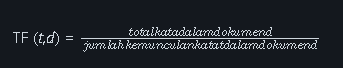


t = kata yang dievaluasi
d = dokumen


Inverse Document Frequency (IDF): Mengukur seberapa unik atau jarang kata tersebut muncul dalam keseluruhan koleksi dokumen. Rumusnya adalah:

IDF (*t,D*) = log $\frac {total dokumen dalam koleksi D}{jumlah dokumen yang mengandung kata t+1}$​

t = kata yang dievaluasi
D = koleksi dokumen
Setelah mendapatkan nilai TF dan IDF, nilai TF-IDF dihitung dengan mengalikan keduanya:


TF-IDF(t, d, D) = TF (t,d) x IDF (t,d)

In [ ]:
# TF-IDF
# TfidfVectorizer
# CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd

countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
count_wm = countvectorizer.fit_transform(text)
tfidf_wm = tfidfvectorizer.fit_transform(text)

count_tokens = countvectorizer.get_feature_names_out()
tfidf_tokens = tfidfvectorizer.get_feature_names_out()
df_countvect = pd.DataFrame(data = count_wm.toarray(),columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)
df_countvect['Judul'] = df["Judul"]
columns = ['Judul'] + [col for col in df_countvect.columns if col != 'Judul']
df_countvect = df_countvect[columns]
print("Count Vectorizer\n")
df_countvect

Count Vectorizer



,Judul,00,000,001,00172,002,003,004,005,0057,...,yusuf,zakat,zaman,zehro,zhitung,zholam,zn,zr,ztabel,zulfa
0,Pengaruh Penggunaan Media Audio Visual Terhada...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Strategi Sekolah dalam Upaya Penguatan Karakte...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Perbandingan Hasil Belajar Cooperative Learnin...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Kemampuan Berpikir Tingkat Tinggi Siswa Kelas ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Hubungan Antara Kemandirian Belajar dengan Has...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,PENGEMBANGAN MAJALAH BERBASIS GAME MOBILE LEGE...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
909,PENGEMBANGAN PERANGKAT PEMBELAJARAN MODEL\nPRO...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
910,Problematika Pembelajaran Daring Siswa Kelas R...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
911,PENDAMPINGAN ORANG TUA DALAM PROSES BELAJAR AN...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Membuat Term Frequency
vsm_tf = df_countvect

# Tampilkan TF
print("Vector Space Model (Term Frequency)\n")
vsm_tf

Vector Space Model (Term Frequency)



,Judul,00,000,001,00172,002,003,004,005,0057,...,yusuf,zakat,zaman,zehro,zhitung,zholam,zn,zr,ztabel,zulfa
0,Pengaruh Penggunaan Media Audio Visual Terhada...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Strategi Sekolah dalam Upaya Penguatan Karakte...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Perbandingan Hasil Belajar Cooperative Learnin...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Kemampuan Berpikir Tingkat Tinggi Siswa Kelas ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Hubungan Antara Kemandirian Belajar dengan Has...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,PENGEMBANGAN MAJALAH BERBASIS GAME MOBILE LEGE...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
909,PENGEMBANGAN PERANGKAT PEMBELAJARAN MODEL\nPRO...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
910,Problematika Pembelajaran Daring Siswa Kelas R...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
911,PENDAMPINGAN ORANG TUA DALAM PROSES BELAJAR AN...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Hapus kolom 'Judul' dari DataFrame df_countvect
df_dropJudul = df_countvect.drop(columns=['Judul'])

# Tampilkan DataFrame tanpa kolom 'Judul'
print("Count Vectorizer\n")
df_dropJudul

Count Vectorizer



,00,000,001,00172,002,003,004,005,0057,0063,...,yusuf,zakat,zaman,zehro,zhitung,zholam,zn,zr,ztabel,zulfa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
909,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Membuat Cluster**

Menggunakan algoritma K-Means dari pustaka scikit-learn untuk melakukan clustering pada data TF-IDF dari sebuah DataFrame. Jumlah cluster yang diinginkan ditetapkan menjadi 2. Setelah inisialisasi model K-Means, dilakukan clustering pada data TF-IDF, dan hasilnya adalah label cluster untuk setiap dokumen. Label-cluster ini kemudian ditambahkan sebagai kolom baru ke dalam DataFrame yang berisi judul dokumen. Dengan demikian dapat melihat bagaimana dokumen-dokumen dikelompokkan ke dalam dua cluster berdasarkan representasi TF-IDF.

In [ ]:
from sklearn.cluster import KMeans

# Jumlah cluster yang diinginkan
num_clusters = 3

# Menginisialisasi model K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Melakukan clustering pada data TF-IDF
clusters = kmeans.fit_predict(tfidf_wm)

# Menambahkan kolom cluster ke DataFrame
df_countvect['Cluster'] = clusters

# Tampilkan hasil
df_countvect[['Judul', 'Cluster']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyError: ignored

## **Topic Modelling (LDA)**

Topic Modeling adalah suatu teknik dalam pemrosesan teks dan analisis dokumen yang bertujuan untuk mengidentifikasi dan mengekstrak topik atau tema utama yang muncul dalam sebuah koleksi dokumen. Teknik ini membantu dalam memahami struktur dan konten dokumen secara menyeluruh dengan mengelompokkan kata-kata yang sering muncul bersama-sama ke dalam topik yang kohesif.

Salah satu metode yang umum digunakan untuk topic modeling adalah Latent Dirichlet Allocation (LDA). LDA mengasumsikan bahwa setiap dokumen dalam koleksi dapat dijelaskan oleh kombinasi linier dari topik-topik yang tersembunyi, dan setiap kata dalam dokumen berasal dari salah satu topik tersebut. LDA kemudian berusaha untuk mengidentifikasi distribusi topik di seluruh koleksi dokumen dan distribusi kata di dalam setiap topik.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation

Menggunakan model Latent Dirichlet Allocation (LDA) dari pustaka scikit-learn untuk melakukan pemodelan topik pada data yang terdapat dalam DataFrame df_countvect.

n_components=2
Menentukan jumlah topik yang diinginkan. Dalam hal ini, Anda telah mengatur jumlah topik menjadi 2.

doc_topic_prior=0.2 dan topic_word_prior=0.1
Parameter ini mengontrol seberapa “kuat” distribusi topik terhadap dokumen dan kata-kata terhadap topik. Nilai yang lebih tinggi menunjukkan distribusi yang lebih kuat. Di sini, Anda telah mengatur nilai yang lebih rendah.

random_state=42
Digunakan untuk mengontrol inisialisasi acak dalam model. Memberikan nilai tertentu untuk random_state memastikan hasil yang dapat direproduksi.

max_iter=1
Menentukan jumlah iterasi (epoch) maksimum pada setiap panggilan fit. Dalam hal ini, setiap iterasi hanya dijalankan satu kali.

In [ ]:
#jumlah topik, parameter topik dalam satu dokumen, parameter dalam setiap kata ke dalam satu topik, parameter nilai acak, terasi dalam lda
lda = LatentDirichletAllocation(n_components=6, doc_topic_prior=0.2, topic_word_prior=0.1,random_state=42,max_iter=1)
lda_top=lda.fit_transform(df_countvect)

In [ ]:
judul = data["Judul"]

In [ ]:
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)

In [ ]:
#bobot setiap topik terhadap dokumen
U = pd.DataFrame(lda_top, columns=['Topik 1','Topik 2','Topik 3','Topik 4','Topik 5','Topik 6'])
U["Judul"] = judul
U

Menampilkan bobot kata-kata dalam konteks topik-topik yang dihasilkan dan informasi tentang dimensi matriks, yang mencakup jumlah topik dan jumlah kata dalam vokabular yang dianalisis.

In [ ]:
print(lda.components_)
print(lda.components_.shape)  # (no_of_topics*no_of_words)

### Bobot setiap kata terhadap topik

In [ ]:
Membuat DataFrame (VT_tabel) yang merepresentasikan bobot setiap kata dalam setiap topik yang dihasilkan oleh model LDA. Menggunakan loop untuk menentukan label setiap kata dalam vokabular dan membuat DataFrame dengan kolom-kolom yang sesuai. Kemudian, Mentranspose matriks dan mengganti nama indeks dengan label “Topik 1”, “Topik 2”, dan “Topik 3”.

In [ ]:
#bobot setiap kata terhadap topik
label=[]
for i in range (1,(lda.components_.shape[1]+1)):
  masukan = TF.columns[i-1]
  label.append(masukan)
VT_tabel = pd.DataFrame(lda.components_,columns=label)
VT_tabel.rename(index={0:"Topik 1",1:"Topik 2",2:"Topik 3",3:"Topik 4",4:"Topik 5",5:"Topik 6"}).transpose()

### Membuat Cluster

Menggunakan algoritma K-Means untuk melakukan clustering pada hasil transformasi model Latent Dirichlet Allocation (LDA). Label cluster hasil clustering kemudian diterapkan pada setiap dokumen, dan informasi ini disusun dalam DataFrame baru (duf). DataFrame tersebut menyajikan nomor dokumen bersama dengan label cluster yang menunjukkan pengelompokan dokumen-dokumen ke dalam dua cluster.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(lda_top)
cluster_labels = kmeans.labels_
data = {'Dokumen': range(len(cluster_labels)), 'Cluster': cluster_labels}
duf = pd.DataFrame(data)
duf

In [ ]:
#bobot setiap topik terhadap dokumen
U["Clustering"] = cluster_labels
U

### Silhouette Coefficient

Silhouette Coefficient adalah suatu matrik evaluasi yang digunakan untuk mengukur seberapa baik suatu objek telah diklasifikasikan dalam suatu cluster dalam analisis klastering atau clustering. Matrik ini memberikan nilai antara -1 dan 1, di mana nilai positif menunjukkan bahwa objek berada dalam cluster yang sesuai dan sejauh mungkin dari cluster lainnya. Nilai negatif menunjukkan bahwa objek mungkin telah salah diklasifikasikan dan seharusnya berada dalam cluster lain. Metrik Silhouette Coefficient dihitung dengan membandingkan jarak rata-rata antara objek dengan objek dalam cluster yang sama (a) dengan jarak rata-rata antara objek dengan objek dalam cluster terdekat lainnya (b). Formula umumnya adalah:

Silhouette Coefficient = 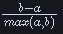


In [ ]:
from sklearn.metrics import silhouette_score

# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(lda_top)
cluster_labels = kmeans.labels_

# Hitung Silhouette Coefficient
silhouette_avg = silhouette_score(lda_top, cluster_labels)
print("Silhouette Coefficient:", silhouette_avg)

### Pengelompokan Berdasarkan Cluster

Melakukan pemfilteran dokumen berdasarkan label klaster yang diberikan oleh model K-Means. Dokumen-dokumen yang teratribut ke dalam Cluster 0 dan Cluster 1 dipisahkan menjadi dua DataFrame terpisah (cluster_0_documents dan cluster_1_documents). Selanjutnya mengambil judul dokumen untuk setiap kluster menggunakan indeks dokumen yang sesuai dan membuat DataFrame baru untuk masing-masing kluster (cluster_0_df dan cluster_1_df). Terakhir cetak tabel yang memuat informasi judul, nomor dokumen, dan label kluster untuk setiap dokumen di Cluster 0 dan Cluster 1.

In [ ]:
# Filter dokumen dengan cluster 0 dan 1
cluster_0_documents = duf[duf['Cluster'] == 0]
cluster_1_documents = duf[duf['Cluster'] == 1]

# Ambil judul dokumen untuk masing-masing cluster
cluster_0_document_titles = judul[cluster_0_documents['Dokumen']]
cluster_1_document_titles = judul[cluster_1_documents['Dokumen']]

# Buat DataFrame untuk masing-masing cluster
cluster_0_df = pd.DataFrame({'Judul Dokumen': cluster_0_document_titles, 'Dokumen': cluster_0_documents['Dokumen'], 'Cluster': cluster_0_documents['Cluster']})
cluster_1_df = pd.DataFrame({'Judul Dokumen': cluster_1_document_titles, 'Dokumen': cluster_1_documents['Dokumen'], 'Cluster': cluster_1_documents['Cluster']})

# Tampilkan tabel untuk Cluster 0
print("Dokumen Cluster 0:")
print(cluster_0_df)

# Tampilkan tabel untuk Cluster 1
print("\nDokumen Cluster 1:")
print(cluster_1_df)